<a href="https://colab.research.google.com/github/mrefugionv/S8---ZUBER/blob/main/S8_ANALISIS_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO SPRINT 8 : Recopilación y almacenamiento de datos (SQL)

## Paso 4. Análisis exploratorio de datos (Python)

### Importación de los archivos

In [ ]:
# Cargar todas las librerías

import pandas as pd                      # Manejo de dataframes
from matplotlib import pyplot as plt    # Crear gráficos
import seaborn as sns                   # Grafico de caja -bigotes
import numpy as np                       # Trabajar con matrices
from scipy import stats as st            # Calculos estadísticos
import math as mt                        # funciones matematicas (ej. sqrt)
import datetime                            # trabajar con fechas

In [ ]:
# Carga los archivos de datos en diferentes DataFrames

companies = pd.read_csv('datasets/project_sql_result_01.csv')
dropoff_loc = pd.read_csv ('datasets/project_sql_result_04.csv')


### Estudio de datos importados

'Companies' es un data frame que contiene la cantidad de viajes realizados por cada compian entre el 15 y 16 de noviembre de 2017.

Contiene dos columnas:

* company_name - con el nombre de la compañía con tipo de dato objeto ya que es un string, no hay valores auscentes.
* trips_amount - con el numero de viajes realizados en tipo de dato entero ya que es una cantidad, no hay valores auscentes.

Las columnas estan bien descritas por sus nombres y estan en formato snake_case.

In [ ]:
# Imprime la información general/resumida sobre el DataFrame 'companies'
companies.info()
print()
companies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB



,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


'Dropoff_loc' es un data frame que contiene la cantidad de viajes que se finalizaron en los diferentes barrios de Chicago durante noviembre del 2017.

Contiene dos columnas:

* dropoff_location_name - con el nombre del barrio de Chicago con tipo de dato objeto ya que es un string, no hay valores auscentes.
* average_trips - con el promedio de viajes finalizados en cada barrio con tipo de dato flotante ya que es un un promedio, no hay valores auscentes.

Las columnas estan bien descritas por sus nombres y estan en formato snake_case.

In [ ]:
# Imprime la información general/resumida sobre el DataFrame 'dropoff_loc'
dropoff_loc.info()
print()
dropoff_loc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB



,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


### Los 10 principales barrios para finalización de recorrido

In [ ]:
# Aseguramos que las filas esten en orden descendente de acuerdo a columna del promedio de viajes
dropoff_loc.sort_values(by='average_trips', ascending ='False')
# Guardamos los primeros  10 en un DF para graficar
dropoff_loc_top10 = dropoff_loc.head(10)
print(dropoff_loc_top10)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


### Gráficos

De acuerdo a lo que se observa en el grafico del dataframe 'Companies', la compañía más popular para realizar viajes en taxi es Flash Cab seguido por Taxi Affiliation Services con apenas el 58%  de los viajes que realiza el primero. Para las siguientes compañías el número sigue desciendiendo, aproximadamente la mitad de las compañías (30) no tienen una presencia destacable en el mercado.

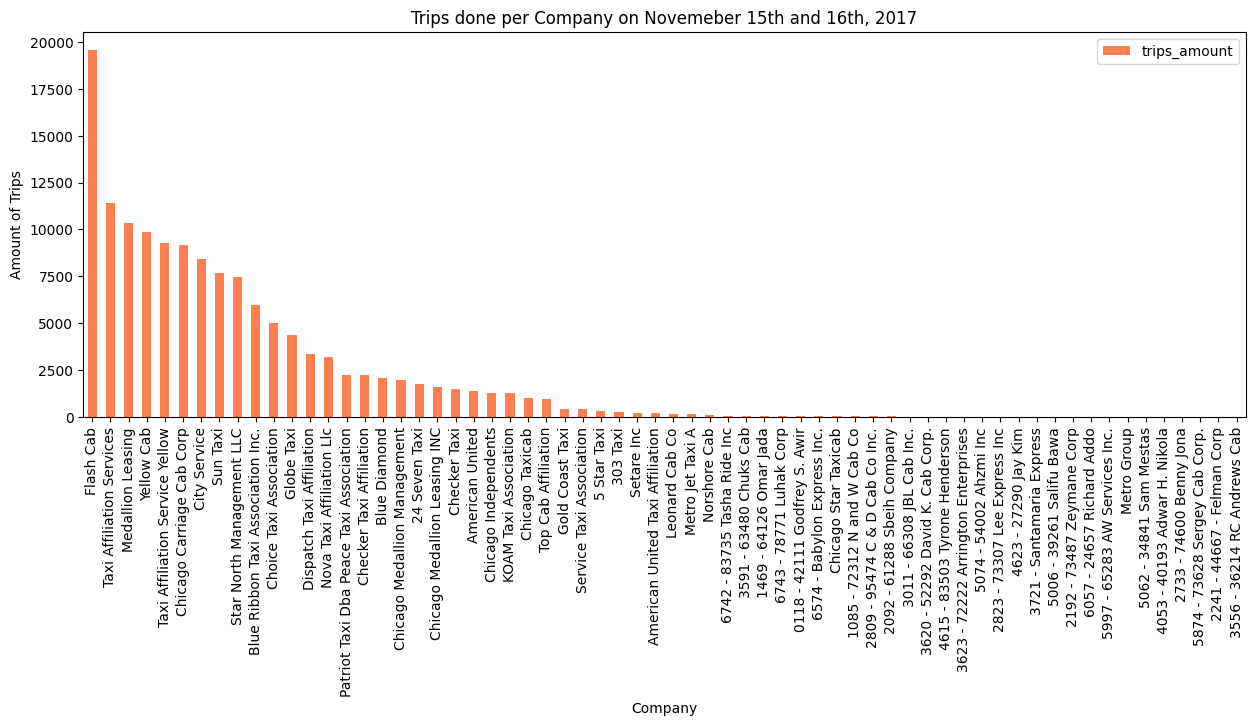

In [ ]:
companies.plot(
    x='company_name',
    y = 'trips_amount',
    title = 'Trips done per Company on Novemeber 15th and 16th, 2017',
    kind ='bar',
    color = 'coral',
    xlabel = 'Company',
    ylabel = 'Amount of Trips',
    figsize =(15,5),
    rot = 90

)
plt.show()

De acuerdo a lo que se observa en el grafico del dataframe 'Dropoff_loc', la finalización de los viajes se concentran en barrios : Loop, River North, Streetville y West Loop.

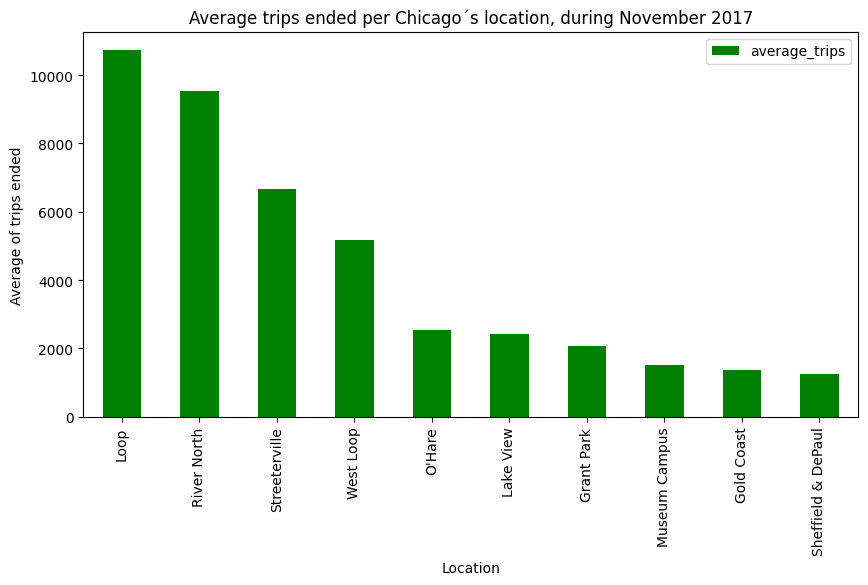

In [ ]:
dropoff_loc_top10.plot(
    x='dropoff_location_name',
    y = 'average_trips',
    title = 'Average trips ended per Chicago´s location, during November 2017',
    kind ='bar',
    color = 'green',
    xlabel = 'Location',
    ylabel = 'Average of trips ended',
    figsize =(10,5),
    rot = 45

)
plt.show()

## Paso 5. Prueba de hipótesis (Python)

Hipótesis nula: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados lluviosos".

Hipótesis alternativa: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Criterio para probar hipótesis: Sera hipótesis de dos colas, ya que queremos saber si son iguales. No importa si el otro valor medio cae a ala izquierda o derecha ya que será igualmente considerado "diferente". Aún no tenemos argumentos para pensar que las hipótesis nula es cierta (equal_var = False).

Valor de alfa, se refiere a la posibilidad de obtener el valor al menos tan extremo como los estas considerando. Se escoge de acuerdo a la necesidad de precisión, siendo comunmente utilizados 10%,5% y 0.1%. Usaremos el 1% de valor alfa.

*** RESULTADO: Rechazamos hipótesis nula, por lo que Ciertamente cambia la duración promedio de los viajes los sabados lluviosos.
Se puede corroborar con los gráficos de bigotes en los que la media de la duración de los viajes en sabados lluviosos es de 2427 segundos, mientras que la de los demás días es menor a 1999 segundos ( ya que hay valores atípicos a la derecha que aumentan el valor de la media).

In [ ]:
#Se crea DF con los datos
loop_ohare = pd.read_csv ('datasets/project_sql_result_07.csv')
#conversión de fechas a timedate
loop_ohare['start_ts']= pd.to_datetime(loop_ohare['start_ts'], format= '%Y-%m-%d  %H:%M:%S')

#anadir columna para día de la semana
weekday_col=[]
for row in loop_ohare['start_ts']:
    day = row.weekday()
    weekday_col.append(day)

loop_ohare['weekday'] = weekday_col # 0 es Lunes, entonces sabado es 5

print(loop_ohare.info())
print(loop_ohare.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   weekday             1068 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 33.5+ KB
None
             start_ts weather_conditions  duration_seconds  weekday
0 2017-11-25 16:00:00               Good            2410.0        5
1 2017-11-25 14:00:00               Good            1920.0        5
2 2017-11-25 12:00:00               Good            1543.0        5
3 2017-11-04 10:00:00               Good            2512.0        5
4 2017-11-11 07:00:00               Good            1440.0        5


In [ ]:
# Se crean dos DF: para los días sabados lluviosos y los demas días

df_rainy_saturdays = loop_ohare[(loop_ohare['weather_conditions'] == 'Bad') & (loop_ohare['weekday'] == 5)]
df_other_days= loop_ohare[(loop_ohare['weather_conditions'] == 'Good')]

print(df_rainy_saturdays.info())
print(df_rainy_saturdays.head())
print()
print(df_other_days.info())
print(df_other_days.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    float64       
 3   weekday             180 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 7.0+ KB
None
              start_ts weather_conditions  duration_seconds  weekday
6  2017-11-04 16:00:00                Bad            2969.0        5
30 2017-11-18 12:00:00                Bad            1980.0        5
34 2017-11-04 17:00:00                Bad            2460.0        5
51 2017-11-04 16:00:00                Bad            2760.0        5
52 2017-11-18 12:00:00                Bad            2460.0        5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entr

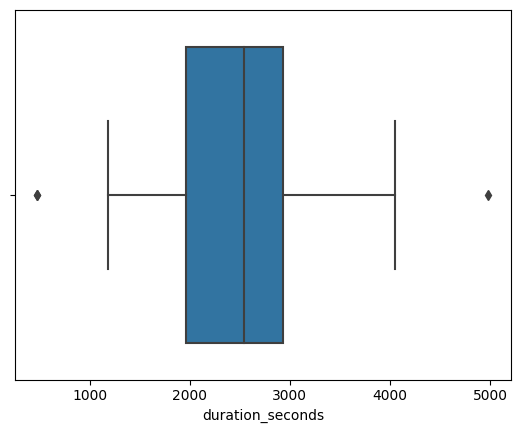

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64


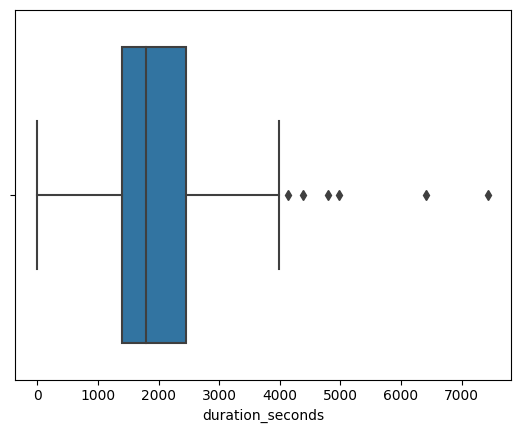

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64


In [ ]:
# Se obtienen serie de tiempo promedio para los sabados lluviosos
time_rainy_saturdays = df_rainy_saturdays['duration_seconds']

# Se obtienen serie de valores de reseñas de usuario para PC
time_other_days = df_other_days['duration_seconds']

sns.boxplot(time_rainy_saturdays)
plt.show()
print(time_rainy_saturdays.describe())

sns.boxplot(time_other_days)
plt.show()
print(time_other_days.describe())

In [ ]:
## COMPROBAMOS HIPÓTESIS ##

alpha = 0.05
results = st.ttest_ind(time_rainy_saturdays,time_other_days,equal_var = False)
#equal_var = False, no se puede asegurar que las varianzas son iguales entre las dos series (sabados lluviosos y demás días).

#Una condicion para rechazar hipótesis nula de 2 colas:
 #La diferencia entre los valores es estadísticamente significativa

if (results.pvalue < alpha): #es una prueba de dos colas (valor de p no se divide entre dos.)
    print("Rechazamos hipótesis nula")
else:
    print("No hay motivos suficientes para rechazar hipótesis nula")

Rechazamos hipótesis nula
